# Line Plot
---
Bagan garis atau line plot adalah jenis plot yang menampilkan informasi sebagai rangkaian titik data yang disebut 'markers' yang dihubungkan oleh segmen garis lurus. Line plot cocok digunakan untuk visualisasi data berbasis tren selama periode waktu tertentu.


### Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
london_crime = pd.read_csv("london_crime_by_lsoa.csv")

### Dengan menggunakan Line Plot, kita dapat memperoleh informasi sebagai berikut:

---
#### Question: Bagaimana tren jumlah kejahatan/kriminal di wilayah metropolitan London tahun 2008-2016?

In [3]:
total_crime = london_crime.drop(["lsoa_code","borough","major_category","minor_category","month"], axis=1)
total_crime = total_crime.groupby("year").sum()
total_crime

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


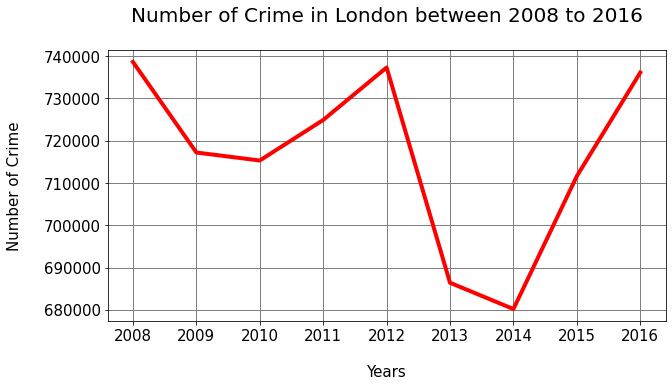

In [7]:
total_crime.plot(figsize=(10,5), legend=False, linewidth=4, color="r")
plt.title("Number of Crime in London between 2008 to 2016\n", fontsize=20)
plt.xlabel("\nYears", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Berdasarkan plot berikut, diketahui pada tahun 2008 angka kejahatan/kriminal di wilayah metropolitan London mencapai angka tertinggi, dan pada tahun 2014 mencapai angka terendah. Dapat diketahui juga bahwa angka kejahatan/kriminal turun di tahun 2009-2010, kemudian naik sampai dengan tahun 2012, selanjutnya turun secara signifikan sampai dengan tahun 2014 dan diikuti kenaikan tahun 2015-2016. Melalui pola ini, dapat disimpulkan secara grafis bahwa 4 tahun sekali angka kejahatan/kriminal di wilayah metropolitan London mengalami kenaikan setelah mengalami penurunan di tahun sebelumnya.

---
#### Question: Bagaimana tren jumlah kejahatan/kriminal di wilayah metropolitan London tertentu (misal Croydon) pada tahun 2008-2016?

In [8]:
borough_crime = london_crime.drop(["major_category","minor_category","month","lsoa_code"],axis=1)
croydon_crime = borough_crime.set_index("borough")
croydon_crime = croydon_crime.loc["Croydon"].groupby("year").sum()
croydon_crime

,value
year,
2008,29516
2009,29784
2010,29373
2011,29830
2012,30189
2013,27444
2014,27357
2015,28089
2016,28712


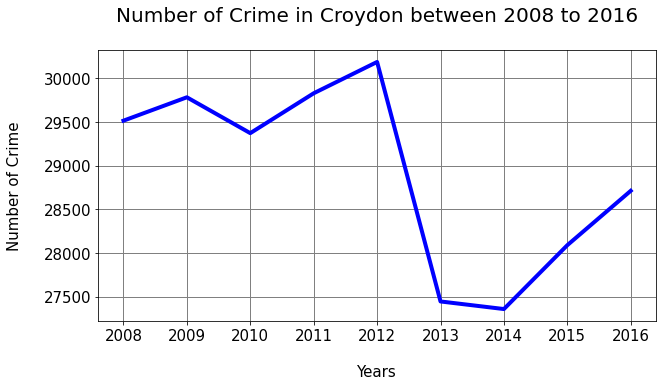

In [9]:
croydon_crime.plot(figsize=(10,5), legend=False, linewidth=4, color="b")
plt.title("Number of Crime in Croydon between 2008 to 2016\n", fontsize=20)
plt.xlabel("\nYears", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Berdasarkan line plot di atas, diketahui bahwa di Croydon, angka kejahatan/kriminal mencapai angka tertinggi pada tahun 2012 dan diikuti dengan penurunan secara signifikan pada tahun 2013-2014. 

Selanjutnya, untuk memperoleh informasi tren jumlah kejahatan di wilayah metropolitan London tertentu selain Croydon yaitu dengan memasukkan salah satu nama dari 33 _borough_ berikut:

In [11]:
print(london_crime["borough"].unique())

['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']


Input borough name (write 'STOP' if its done): Enfield


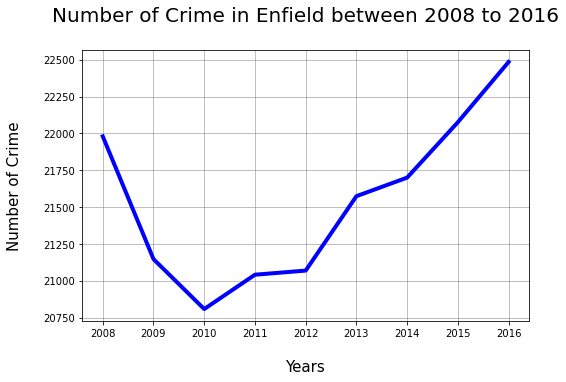

Input borough name (write 'STOP' if its done): Southwark


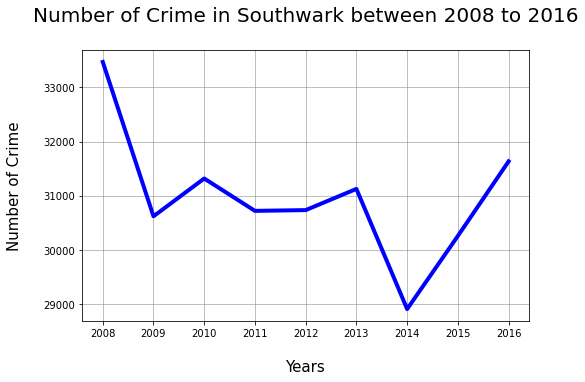

Input borough name (write 'STOP' if its done): City of London


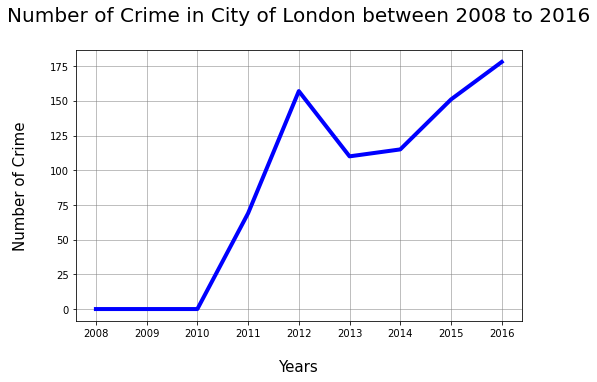

Input borough name (write 'STOP' if its done): test
ERROR! Please insert the right borough
Input borough name (write 'STOP' if its done): STOP
Re-run this code if you want to insert another borough



In [20]:
while True:
    insert_borough = input("Input borough name (write 'STOP' if its done): ")
    if insert_borough=="STOP":
        print("Re-run this code if you want to insert another borough")
        break;
    if not insert_borough in london_crime["borough"].unique(): 
        print("ERROR! Please insert the right borough")
    elif insert_borough in london_crime["borough"].unique():
        borough_crime = london_crime.drop(["major_category","minor_category","month","lsoa_code"],axis=1)
        borough_crime = borough_crime.set_index("borough")
        borough_crime = borough_crime.loc[insert_borough].groupby("year").sum()
        borough_crime.plot(figsize=(8,5), legend=False, linewidth=4, color="b")
        plt.title("Number of Crime in {} between 2008 to 2016\n".format(insert_borough), fontsize=20)
        plt.xlabel("\nYears", fontsize=15)
        plt.ylabel("Number of Crime\n", fontsize=15)
        plt.grid(color="grey", linewidth=0.5)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
print()

Berdasarkan line plot di atas, terdapat perbedaan tren pada masing-masing _borough_ seperti angka kejahatan/kriminal tertinggi di Southwark adalah tahun 2008, sedangkan di Enfield dan City of London adalah tahun 2016. Dengan memasukkan semua nama _borough_, kita dapat mendapatkan informasi yang lebih spesifik menganai tren jumlah kejahatan/kriminal di wilayah metropolitan London tertentu di tahun 2008-2016.

---
#### Question: Bagaimana tren jumlah kejahatan/kriminal berdasarkan kategori mayor tertentu (misal Robbery) pada tahun 2008-2016?

In [21]:
major_crime = london_crime.drop(["borough","minor_category","month","lsoa_code"],axis=1)
major_crime = major_crime.set_index("major_category")
robbery_crime = major_crime.loc["Robbery"].groupby("year").sum()
robbery_crime

,value
year,
2008,29627
2009,29568
2010,32341
2011,36679
2012,35260
2013,29337
2014,22150
2015,21383
2016,22528


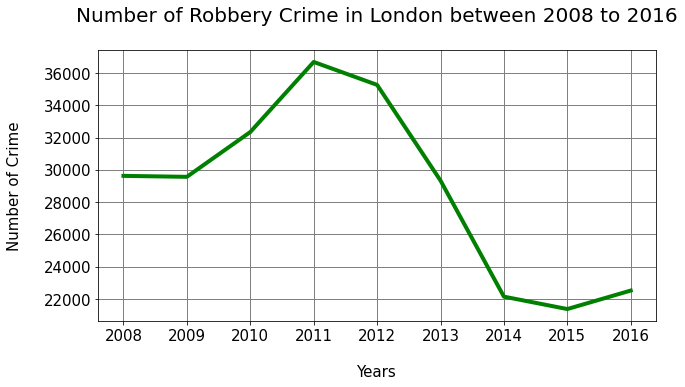

In [23]:
robbery_crime.plot(figsize=(10,5), legend=False, linewidth=4, color="g")
plt.title("Number of Robbery Crime in London between 2008 to 2016\n", fontsize=20)
plt.xlabel("\nYears", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Berdasarkan line plot berikut, diketahui bahwa kategori Robbory atau perampokan mencapai angka tertinggi pada tahun 2011 dan mencapai angka terendah pada tahun 2015.

Selanjutnya, berikut adalah line plot dari jumlah kejahatan/kriminal berdasarkan kategori mayor tertentu dari tahun 2008-2016:

In [24]:
print(london_crime["major_category"].unique())

['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']


In [25]:
major_crime = london_crime.drop(["borough","minor_category","month","lsoa_code"],axis=1)
major_crime = major_crime.set_index("major_category")
robbery_crime = major_crime.loc["Robbery"].groupby("year").sum()
burglary_crime = major_crime.loc["Burglary"].groupby("year").sum()
violance_crime = major_crime.loc["Violence Against the Person"].groupby("year").sum()
theft_crime = major_crime.loc["Theft and Handling"].groupby("year").sum()
criminal_crime = major_crime.loc["Criminal Damage"].groupby("year").sum()
drugs_crime = major_crime.loc["Drugs"].groupby("year").sum()
fraud_crime = major_crime.loc["Fraud or Forgery"].groupby("year").sum()
sexual_crime = major_crime.loc["Sexual Offences"].groupby("year").sum()
other_crime = major_crime.loc["Other Notifiable Offences"].groupby("year").sum()

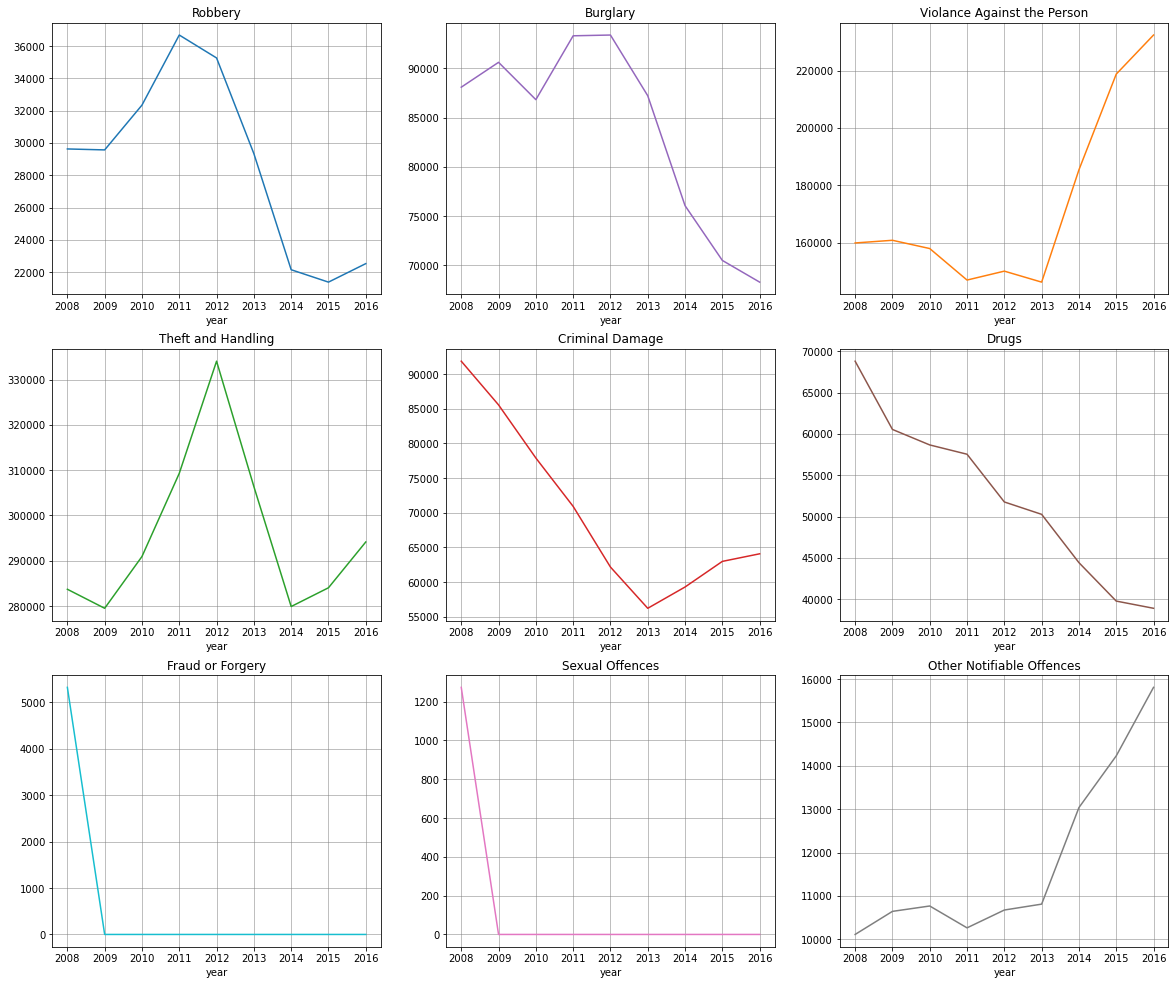

In [53]:
fig = plt.figure(figsize=(20,17))

ax0 = fig.add_subplot(3,3,1) #1
ax1 = fig.add_subplot(3,3,2) #2
ax2 = fig.add_subplot(3,3,3) #3
ax3 = fig.add_subplot(3,3,4) #4
ax4 = fig.add_subplot(3,3,5) #5
ax5 = fig.add_subplot(3,3,6) #6
ax6 = fig.add_subplot(3,3,7) #7
ax7 = fig.add_subplot(3,3,8) #7
ax8 = fig.add_subplot(3,3,9) #7

robbery_crime.plot(kind="line", ax=ax0, legend=False, color="tab:blue")
ax0.set_title("Robbery")
ax0.grid(color="grey", linewidth=0.5)

burglary_crime.plot(kind="line", ax=ax1,legend=False, color="tab:purple")
ax1.set_title("Burglary")
ax1.grid(color="grey", linewidth=0.5)

violance_crime.plot(kind="line", ax=ax2, legend=False, color="tab:orange")
ax2.set_title("Violance Against the Person")
ax2.grid(color="grey", linewidth=0.5)

theft_crime.plot(kind="line", ax=ax3, legend=False, color="tab:green")
ax3.set_title("\nTheft and Handling")
ax3.grid(color="grey", linewidth=0.5)

criminal_crime.plot(kind="line", ax=ax4, legend=False, color="tab:red")
ax4.set_title("Criminal Damage")
ax4.grid(color="grey", linewidth=0.5)

drugs_crime.plot(kind="line", ax=ax5, legend=False, color="tab:brown")
ax5.set_title("Drugs")
ax5.grid(color="grey", linewidth=0.5)

fraud_crime.plot(kind="line", ax=ax6, legend=False, color="tab:cyan")
ax6.set_title("Fraud or Forgery")
ax6.grid(color="grey", linewidth=0.5)

sexual_crime.plot(kind="line", ax=ax7, legend=False, color="tab:pink")
ax7.set_title("Sexual Offences")
ax7.grid(color="grey", linewidth=0.5)

other_crime.plot(kind="line", ax=ax8, legend=False, color="tab:gray")
ax8.set_title("Other Notifiable Offences")
ax8.grid(color="grey", linewidth=0.5)

Berdasarkan plot berikut diketahui bahwa masing-masing kejahatan/kriminal kategori mayor memiliki pola tren masing-masing dan mencapai angka tertinggi/terendah di tahun yang berbeda-beda.

---
#### Question: Bagaimana tren jumlah kejahatan/kriminal berdasarkan kategori minor (misal Theft from Shops) di tahun 2008-2016?

In [54]:
minor_crime = london_crime.drop(["lsoa_code","borough","major_category","month"], axis=1)
minor_crime = minor_crime.set_index("minor_category")
theft_crime = minor_crime.loc["Theft From Shops"].groupby("year").sum()
theft_crime

,value
year,
2008,32857
2009,36349
2010,36935
2011,36351
2012,36562
2013,36441
2014,40141
2015,42549
2016,46957


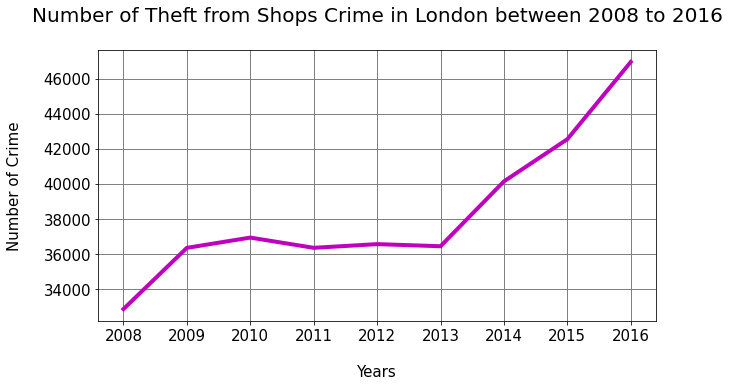

In [55]:
theft_crime.plot(figsize=(10,5), legend=False, linewidth=4, color="m")
plt.title("Number of Theft from Shops Crime in London between 2008 to 2016\n", fontsize=20)
plt.xlabel("\nYears", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Berdasarkan line plot di atas, diketahui bahwa kejahatan/kriminal jenis "Theft from Shops" atau pencurian di toko tertentu membentuk pola tren naik dan mencapai angka tertinggi di tahun 2016. 

### Selain dari informasi yang sudah dilampirkan sebelumnya, dengan menggunakan Line Plot juga dapat memperoleh informasi yang lebih spesifik lagi berdasarkan data berbasis waktu, seperti:
1. Tren jumlah kejahatan/kriminal berdasarkan kategori mayor/minor di wilayah metropolitan/Borough tertentu (misal tren kejahatan/kriminal kategori Sexual Offences di Westminster),
2. Tren jumlah kejahatan/kriminal berdasarkan kategori mayor/minor di tahun tertentu (per bulan) (misal tren kejahatan/kriminal kategori Drugs perbulannya pada tahun 2016),
3. Tren jumlah kejahatan/kriminal di wilayah metropolitan/Borough tertentu di tahun tertentu (per bulan) (misal tren kejahatan/kriminal Violance Against the Person di Newham perbulannya pada tahun 2012), dst.

# Conclusions

Dengan menggunakan Line Plot kita dapat menyimpulkan beberapa informasi dari kumpulan data London Crime, 2008-2016, yaitu:
1. Total jumlah kejahatan/kriminal di London mengalami kenaikan (hampir mencapai angka tertinggi) setiap 4 tahun sekali, yaitu 2008, 2012, dan 2016.
2. Total jumlah kejahatan/kriminal di wilayah metropolitan tertentu membentuk tren yang berbeda-beda, contoh Croydon mencapai angka kejahatan/kriminal tertinggi di tahun 2012, sedangkan City of London mencapai angka kejahatan/kriminal tertinggi di tahun 2016.
3. Total jumlah kejahatan/kriminal berdasarkan kategori mayor/minor juga membentuk tren yang berbeda-beda, contoh Theft and Handling dan Robbery mencapai angka tertinggi di tahun 2012, sedangkan untuk kategori Violance Against the Person membentuk tren naik dan mencapai angka tertinggi di tahun 2016.
4. Karena jumlah kejahatan/kriminal, baik itu di wilayah tertentu atau kategori tertentu, rata-rata mengalami kenaikan yang signifikan setiap 4 tahun sekali, yaitu tahun 2008, 2012, dan 2016, maka patut menjadi perhatian untuk mengevaluasi kejadian-kejadian ini selama periode tertentu guna mengurangi angka kejahatan/kriminal di wilayah metropolitan London.